In [4]:
import seaborn as sns
from chase.base import *
from chase.utils import *
from chase.fit import *
from cogmod import cpt
from scipy.stats import bernoulli

#FIGDEST = '/Users/markant/Dropbox/Apps/ShareLaTeX/ssDFE/ssDFE_v3/figures/'
FIGDEST = 'figures/'

In [2]:
pars = {'theta': 5,
        'p_stay': 0.,
        'N': 1000}

m = CHASEModel(drift='ev', startdist='indifferent')

# Generate problem sets

In [35]:
int_high = np.array([10, 30, 60, 120, 240])

M = 1
problems_rare = []
for i in range(M):
    low = np.random.random() * 50
    highs = low + int_high + np.random.random(len(int_high)) * 10
    
    p_low = [.1, .1, .1, .1, .1]
    
    R = [[low, .5]]
    for h, p in zip(highs, p_low):
        R.append([h, p])
    R = np.array(R)

    S = [[expected_value(R) - 1, 1.]]
    for h in highs:
        S.append([0., 0.])
    S = np.array(S)
    
    problems_rare.append(np.array([S, R]))
    print m.drift(problems_rare[-1], pars)

0.00648632051421


In [36]:
int_high = np.array([10, 20, 30, 40])

M = 10
problems_rare = []
for i in range(M):
    low = np.random.random() * 50
    highs = low + int_high + np.random.random(len(int_high)) * 10
    
    p_low = [.1, .06, .03, .01]
    
    R = [[low, .8]]
    for h, p in zip(highs, p_low):
        R.append([h, p])
    R = np.array(R)

    S = [[expected_value(R) - .1, 1.]]
    for h in highs:
        S.append([0., 0.])
    S = np.array(S)
    
    problems_rare.append(np.array([S, R]))
    print m.drift(problems_rare[-1], pars)

0.00509543214909
0.00473183273777
0.00508035349985
0.00516157527508
0.00470955611175
0.00539272057695
0.00490620426369
0.00515916552974
0.00493743745112
0.00554630287765


In [37]:
D = [m.drift(prob, pars) for prob in problems_rare]
print D
print np.mean(D)

[0.005095432149091873, 0.0047318327377698218, 0.0050803534998462635, 0.0051615752750783844, 0.0047095561117500078, 0.0053927205769496818, 0.0049062042636946702, 0.0051591655297351362, 0.0049374374511172263, 0.0055463028776450056]
0.00507205804727


In [ ]:
int_high = np.array([10, 20, 40, 80])

M = 20
problems_rare = []
for i in range(M):
    low = np.random.random() * 50
    highs = low + int_high + np.random.random(len(int_high)) * 10
    
    p = np.array([.7, .15, .09, .05, .01])
    #p = p + np.random.random(p.shape)/10
    #p = p/np.sum(p)
    print p

    #p = [.4 + np.random.random() * .2]
    #for j in range(len(int_high)):
    #    rem = 1 - np.sum(p)
    #    if j < (len(int_high) - 1):
    #        p.append(np.random.random() * rem)
    #    else:
    #        p.append(rem)
    
    print np.sum(p)
    assert np.isclose(np.sum(p), 1.)
    
    #r = np.random.random()/30
    #p_low = [.1, .1, .05, .05]
    
    R = [[low, p[0]]]
    for h, p_i in zip(highs, p[1:]):
        R.append([h, p_i])
    R = np.array(R)

    S = [[expected_value(R) - 1, 1.]]
    for h in highs:
        S.append([0., 0.])
    S = np.array(S)
    
    problems_rare.append(np.array([S, R]))
    print m.drift(problems_rare[-1], pars)

In [39]:
np.sum(R[:,1])

1.0

## Skewed problem set

In [47]:
int_high = np.array([50])

M = 20
problems_rare = []
for i in range(M):
    low = np.random.random() * 50
    highs = low + int_high + np.random.random(len(int_high)) * 100
    
    r = np.random.random() * .3
    p = np.array([1 - r, r])
        
    R = [[low, p[0]]]
    for h, p_i in zip(highs, p[1:]):
        R.append([h, p_i])
    R = np.array(R)

    S = [[expected_value(R) - np.random.random() * 10, 1.]]
    for h in highs:
        S.append([0., 0.])
    S = np.array(S)
    
    problems_rare.append(np.array([S, R]))
    print m.drift(problems_rare[-1], pars)

0.104245433573
0.0744452112672
0.125596476508
0.0396752825123
0.378471390477
0.213767316884
0.133951190607
0.115225363578
0.09191972905
0.0517073377229
0.0926022653564
0.282780666808
0.0492914684716
0.110196331061
0.412140740529
0.423373927835
0.0398173744796
0.582327229944
0.13549845276
0.155815887052


In [48]:
D = [m.drift(prob, pars) for prob in problems_rare]
print D
print np.mean(D)

[0.10424543357288239, 0.074445211267200384, 0.12559647650779199, 0.039675282512338088, 0.37847139047689898, 0.21376731688363271, 0.13395119060721986, 0.11522536357753574, 0.091919729050044335, 0.05170733772285252, 0.092602265356438229, 0.28278066680759611, 0.049291468471607924, 0.11019633106125064, 0.41214074052885596, 0.42337392783454536, 0.039817374479558423, 0.58232722994402075, 0.13549845275993946, 0.1558158870519363]
0.180642453824


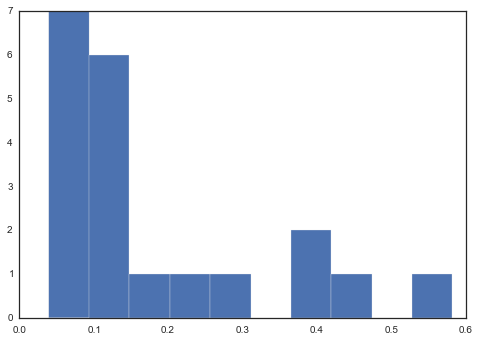

In [49]:
plt.hist(D)
plt.show()

## Balanced problem set

In [10]:
int_high = np.array([50])

M = 20
problems_bal = []
for i in range(M):
    low = np.random.random() * 50
    highs = low + int_high + np.random.random(len(int_high)) * 100
    
    r = np.random.random() * .2
    p = np.array([.4 + r, 1 - (.4 + r)])
            
    R = [[low, p[0]]]
    for h, p_i in zip(highs, p[1:]):
        R.append([h, p_i])
    R = np.array(R)

    S = [[expected_value(R) - np.random.random() * 5, 1.]]
    for h in highs:
        S.append([0., 0.])
    S = np.array(S)
    
    problems_bal.append(np.array([S, R]))
    print m.drift(problems_bal[-1], pars)

0.033578148581
0.0233055141837
0.050927985978
0.0522523111035
0.0141631522527
0.0342989014957
0.0753788155924
0.00604433197056
0.00882308280269
0.0355597221811
0.0427027265616
0.0361860052758
0.0517976010084
0.0189898516638
0.0398622369419
0.0658850150255
0.00665475923912
0.000576330661329
0.0172181131386
0.000374972661916


In [5]:
import pickle

In [6]:
with open('problems_balanced.pkl', 'w') as f:
    pickle.dump(problems_bal, f)

In [11]:
D = [m.drift(prob, pars) for prob in problems_bal]
print D
print np.mean(D)

[0.033578148580990883, 0.023305514183711677, 0.050927985977986118, 0.052252311103510828, 0.014163152252655936, 0.034298901495679289, 0.075378815592384227, 0.0060443319705613145, 0.008823082802693203, 0.035559722181137662, 0.042702726561589889, 0.036186005275837659, 0.051797601008380871, 0.018989851663797516, 0.039862236941903571, 0.065885015025469465, 0.0066547592391228783, 0.00057633066132884423, 0.017218113138570329, 0.00037497266191645085]
0.030728978916


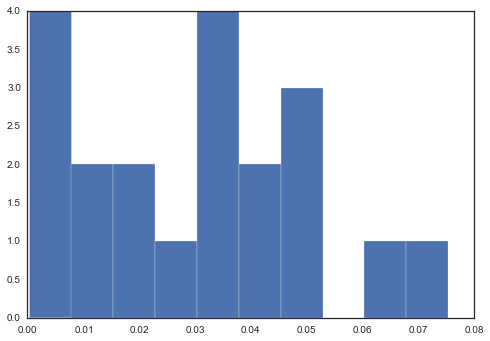

In [12]:
plt.hist(D)
plt.show()

## Sim 1B: Recovery of linear weighting (over varying thresholds)

### Skewed dataset

In [112]:
cpt_fits = {}

cols = ['subject', 'problem', 'group', 'choice', 'samplesize']
p_stay = 0.2
N = 10000
N_ITER = 20
N_FIT_ITER = 1
max_T = 500

thetas = range(1, 15)
gammas = [.5, .75, 1., 1.25, 1.5]

In [50]:
problems = {i: problems_rare[i] for i in range(len(problems_rare))}

In [114]:
# generate the data, with distortion
for gamma in [1.]:
    for theta in thetas:
        print 'theta: %s' % theta
        pars = {'theta': theta,
                'p_stay': p_stay,
                'prelec_gamma': gamma,
                'N': N,
                'max_T': max_T}

        # create the model with EV-based drift
        m = CHASEModel(drift='cpt', startdist='indifferent', problems=problems)

        arr = []
        for pid in problems:
            res = m(problems[pid], pars)
            pH = res['p_resp'][1]
            choice = bernoulli.rvs(pH, size=N)

            p_stop_0 = res['p_stop_cond'][:,0]
            p_stop_0 = p_stop_0/p_stop_0.sum()

            p_stop_1 = res['p_stop_cond'][:,1]
            p_stop_1 = p_stop_1/p_stop_1.sum()

            ss = np.zeros(N)
            x = np.arange(1, pars['max_T'] + 1)
            try:
                ss[choice==0] = np.random.choice(x,
                                             p=p_stop_0,
                                             size=np.sum(choice==0))
                ss[choice==1] = np.random.choice(x,
                                             p=p_stop_1,
                                             size=np.sum(choice==1))
            except:
                print 'error'
                print res['p_stop_cond'][:,0].sum()
                print res['p_stop_cond'][:,1].sum()


            for i in range(N):
                arr.append([i, pid, 0, choice[i], ss[i]])

        df = pd.DataFrame(arr, columns=cols)
        df.to_csv('sim1b_2_dataset_theta=%s_gamma=%s_N=%s.csv' % (theta, pars['prelec_gamma'], N))

theta: 1
theta: 2
theta: 3
theta: 4
theta: 5
theta: 6
theta: 7
theta: 8
theta: 9
theta: 10
theta: 11
theta: 12
theta: 13
theta: 14


In [116]:
for theta in thetas:

    for gamma in gammas:
        print 'theta=%s, gamma=%s' % (theta, gamma)

        # load the data
        df = pd.read_csv('sim1b_2_dataset_theta=%s_gamma=%s_N=%s.csv' % (theta, gamma, N), index_col=0)
        fitting = {'s': [0, np.inf, 1.],
                   'prelec_gamma': [0, 10, 1.]}
        cpt_fits[(theta, gamma)] = cpt.fit_msd(problems_rare, df, 'cptfit_problems_rare_2_gamma_2016Apr', fixed={}, fitting=fitting,
                                      niter=N_FIT_ITER)
        print cpt_fits[(theta, gamma)].sort('msd')



theta=1, gamma=0.5
cptfit_problems_rare_2_gamma_2016Apr(prelec_gamma,s|)
   iteration success  k       N      msd  prelec_gamma         s
0          0    True  2  200000  0.00063      0.462383  0.024993
theta=1, gamma=0.75
cptfit_problems_rare_2_gamma_2016Apr(prelec_gamma,s|)
   iteration success  k       N       msd  prelec_gamma         s
0          0    True  2  200000  0.000895      0.961508  0.048565
theta=1, gamma=1.0
cptfit_problems_rare_2_gamma_2016Apr(prelec_gamma,s|)
   iteration success  k       N       msd  prelec_gamma         s
0          0    True  2  200000  0.002906      1.265058  0.082382
theta=1, gamma=1.25
cptfit_problems_rare_2_gamma_2016Apr(prelec_gamma,s|)
   iteration success  k       N       msd  prelec_gamma         s
0          0    True  2  200000  0.015453      1.417019  0.161204
theta=1, gamma=1.5
cptfit_problems_rare_2_gamma_2016Apr(prelec_gamma,s|)
   iteration success  k       N       msd  prelec_gamma         s
0          0    True  2  200000  0.021204

In [ ]:
#arr = []
#for th in thetas:
#    arr.append(cpt_fits[th].values[0])
#cpt_fits_skewed = pd.DataFrame(np.array(arr), columns=['iteration', 'success', 'k', 'N', 'msd', 'prelec_gamma', 's'])
#cpt_fits_skewed.index = thetas
#cpt_fits_skewed.to_csv('sim1b_2_cptfits_dataset=skewed.csv')

In [117]:
for gamma in gammas:
    arr = []
    for th in thetas:
        arr.append(cpt_fits[(th, gamma)].values[0])
    cpt_fits_skewed_gamma = pd.DataFrame(np.array(arr), columns=['iteration', 'success', 'k', 'N', 'msd', 'prelec_gamma', 's'])
    cpt_fits_skewed_gamma.index = thetas
    cpt_fits_skewed_gamma.to_csv('sim1b_2_cptfits_dataset=skewed_gamma=%s.csv' % gamma)

### Balanced dataset

In [134]:
problems = {i: problems_bal[i] for i in range(len(problems_bal))}

# generate the data
for gamma in [.5]:
    for theta in thetas:
        print 'theta: %s' % theta
        pars = {'theta': theta,
                'p_stay': p_stay,
                'prelec_gamma': gamma,
                'N': N,
                'max_T': max_T}

        # create the model with EV-based drift
        m = CHASEModel(drift='cpt', startdist='indifferent', problems=problems)

        arr = []
        for pid in problems:
            res = m(problems[pid], pars)
            pH = res['p_resp'][1]
            choice = bernoulli.rvs(pH, size=N)

            p_stop_0 = res['p_stop_cond'][:,0]
            p_stop_0 = p_stop_0/p_stop_0.sum()

            p_stop_1 = res['p_stop_cond'][:,1]
            p_stop_1 = p_stop_1/p_stop_1.sum()

            ss = np.zeros(N)
            x = np.arange(1, pars['max_T'] + 1)
            try:
                ss[choice==0] = np.random.choice(x,
                                             p=p_stop_0,
                                             size=np.sum(choice==0))
                ss[choice==1] = np.random.choice(x,
                                             p=p_stop_1,
                                             size=np.sum(choice==1))
            except:
                print 'error'
                print res['p_stop_cond'][:,0].sum()
                print res['p_stop_cond'][:,1].sum()


            for i in range(N):
                arr.append([i, pid, 0, choice[i], ss[i]])

        df = pd.DataFrame(arr, columns=cols)
        df.to_csv('sim1b_2_dataset=bal_theta=%s_gamma=%s_N=%s.csv' % (theta, pars['prelec_gamma'], N))

theta: 1
theta: 2
theta: 3
theta: 4
theta: 5
theta: 6
theta: 7
theta: 8
theta: 9
theta: 10
theta: 11
theta: 12
theta: 13
theta: 14


In [121]:
cpt_fits_bal = {}

In [135]:
for theta in thetas:
    for gamma in [.5]:
        print 'theta=%s, gamma=%s' % (theta, gamma)

        # load the data
        df = pd.read_csv('sim1b_2_dataset=bal_theta=%s_gamma=%s_N=%s.csv' % (theta, gamma, N), index_col=0)
        fitting = {'s': [0, np.inf, 1.],
                   'prelec_gamma': [0, 10, 1.]}
        cpt_fits_bal[(theta, gamma)] = cpt.fit_msd(problems_bal, df, 'cptfit_problems_bal_2_gamma_2016Apr', fixed={}, fitting=fitting,
                                      niter=N_FIT_ITER)
        print cpt_fits_bal[(theta, gamma)].sort('msd')
        
for gamma in gammas:
    arr = []
    for th in thetas:
        arr.append(cpt_fits_bal[(th, gamma)].values[0])
    cpt_fits_balanced_gamma = pd.DataFrame(np.array(arr), columns=['iteration', 'success', 'k', 'N', 'msd', 'prelec_gamma', 's'])
    cpt_fits_balanced_gamma.index = thetas
    cpt_fits_balanced_gamma.to_csv('sim1b_2_cptfits_dataset=balanced_gamma=%s.csv' % gamma)

theta=1, gamma=0.5
cptfit_problems_bal_2_gamma_2016Apr(prelec_gamma,s|)
   iteration success  k       N       msd  prelec_gamma             s
0          0    True  2  200000  0.000817      0.985857  2.601369e-08
theta=2, gamma=0.5
cptfit_problems_bal_2_gamma_2016Apr(prelec_gamma,s|)
   iteration success  k       N       msd  prelec_gamma         s
0          0    True  2  200000  0.000153      0.478481  0.032875
theta=3, gamma=0.5
cptfit_problems_bal_2_gamma_2016Apr(prelec_gamma,s|)
   iteration success  k       N       msd  prelec_gamma         s
0          0    True  2  200000  0.000451      0.484673  0.049475
theta=4, gamma=0.5
cptfit_problems_bal_2_gamma_2016Apr(prelec_gamma,s|)
   iteration success  k       N       msd  prelec_gamma         s
0          0    True  2  200000  0.000678      0.500672  0.070132
theta=5, gamma=0.5
cptfit_problems_bal_2_gamma_2016Apr(prelec_gamma,s|)
   iteration success  k       N       msd  prelec_gamma         s
0          0    True  2  200000  0.001

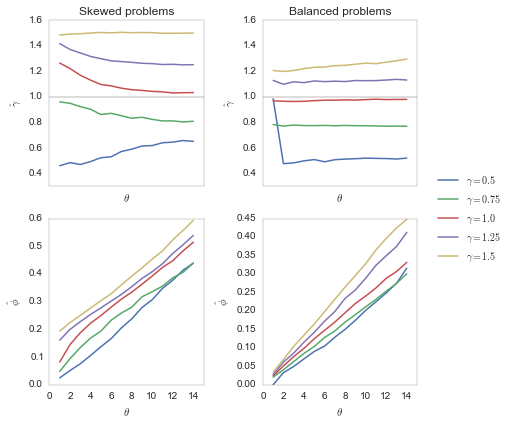

In [143]:
fig, axi = plt.subplots(2, 2, figsize=(6,6), sharex=True)

lw = 1.5

ax = axi[0][0]
#ax.plot(thetas, [cpt_fits[th].loc[0]['prelec_gamma'] for th in thetas],
#        label=('$\gamma=1$'))
for gamma in gammas:
    ax.plot(thetas, [cpt_fits[(th,gamma)].loc[0]['prelec_gamma'] for th in thetas],
            label=('$\gamma=%s$' % gamma), linewidth=lw)


ax.plot([0, thetas[-1] + 1], [1, 1], '-', color='gray', alpha=.3)
ax.set_ylim(0.3, 1.6)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\hat{\gamma}$')
ax.set_title('Skewed problems')
#ax.legend()

#ax2 = ax.twinx()
ax = axi[1][0]
#ax.plot(thetas, [cpt_fits[th].loc[0]['s'] for th in thetas],
#         '-', label='$\gamma=1$')

for gamma in gammas:
    ax.plot(thetas, [cpt_fits[(th,gamma)].loc[0]['s'] for th in thetas],
            '-', label=('$\gamma=%s$' % gamma), linewidth=lw)

ax.set_xlim(0, 15)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\hat{\phi}$') 


ax = axi[0][1]
#ax.plot(thetas, [cpt_fits_bal[th].loc[0]['prelec_gamma'] for th in thetas],
#        label=('$\gamma=1$'))
for gamma in gammas:
    ax.plot(thetas, [cpt_fits_bal[(th,gamma)].loc[0]['prelec_gamma'] for th in thetas],
            label=('$\gamma=%s$' % gamma), linewidth=lw)


ax.plot([0, thetas[-1] + 1], [1, 1], '-', color='gray', alpha=.3)
ax.set_ylim(0.3, 1.6)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\hat{\gamma}$')
ax.set_title('Balanced problems')

#ax2 = ax.twinx()
ax = axi[1][1]
#ax.plot(thetas, [cpt_fits_bal[th].loc[0]['s'] for th in thetas],
#         '-', label='$\gamma=1$')

for gamma in gammas:
    ax.plot(thetas, [cpt_fits_bal[(th,gamma)].loc[0]['s'] for th in thetas],
            '-', label=('$\gamma=%s$' % gamma), linewidth=lw)

ax.set_xlim(0, 15)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\hat{\phi}$') 
ax.legend(loc='center right', bbox_to_anchor=(1.6,1))


for ax in axi.ravel():
    for i in ax.spines.itervalues():
        i.set_linewidth(.2)

plt.tight_layout()
plt.show()
fig.savefig(FIGDEST + 'cpt_fitting_combined.pdf', bbox_inches='tight')

## Recovery: Skewed dataset

In [154]:
N_FIT_ITER = 3
OUTDIR = 'sim1b_recovery_CHASE_dataset=skewed'
problems = {i: problems_rare[i] for i in range(len(problems_rare))}

In [147]:
for theta in thetas:
    
    for gamma in gammas:

        print 'theta=%s, gamma=%s' % (theta, gamma)

        # load the data
        df = pd.read_csv('sim1b_2_dataset_theta=%s_gamma=%s_N=%s.csv' % (theta, gamma, N), index_col=0)

        # fit CHASE
        m = CHASEModel(drift='cpt',
                       startdist='indifferent',
                       problems=problems)
        SIM_ID = 'sim1b_recovery_CHASE_N=%s_theta=%s_gamma=%s' % (N, theta, gamma)

        fitting_CHASE = {'theta': [theta, theta+1],
                         'p_stay': [0, 1, .5],
                         'prelec_gamma': [0, 5, 1.],}

        results = fit_mlh(m, problems_rare, df, 
                          SIM_ID, {}, fitting_CHASE, niter=N_FIT_ITER, outdir=OUTDIR)
        print results.sort('nllh').head(1)

theta=1, gamma=0.5
sim1b_recovery_CHASE_N=10000_theta=1_gamma=0.5(p_stay,prelec_gamma,theta|)
0/6
['theta']: [ 1.]
iteration               0
success              True
nllh             259122.6
k                       3
N                  200000
bic              518281.7
theta                   1
p_stay          0.2008484
prelec_gamma    0.4943607
Name: 0, dtype: object
sim1b_recovery_CHASE_N=10000_theta=1_gamma=0.5(p_stay,prelec_gamma,theta|)
1/6
['theta']: [ 2.]
iteration                0
success               True
nllh               3865733
k                        3
N                   200000
bic                7731502
theta                    2
p_stay          0.07539597
prelec_gamma     0.7504815
Name: 1, dtype: object
sim1b_recovery_CHASE_N=10000_theta=1_gamma=0.5(p_stay,prelec_gamma,theta|)
2/6
['theta']: [ 1.]
iteration               1
success              True
nllh             259122.6
k                       3
N                  200000
bic              518281.7
theta         

In [150]:
chase_fits_skew = {}

for theta in thetas:

    for gamma in gammas:
        print 'theta=%s, gamma=%s' % (theta, gamma)

        model_id = 'sim1b_recovery_CHASE_N=%s_theta=%s_gamma=%s' % (N, theta, gamma)
        chase_fits_skew[(theta, gamma)] = best_result(model_id, {}, fitting_CHASE, outdir=OUTDIR)

## Recovery: Balanced dataset

In [158]:
N_FIT_ITER = 1
OUTDIR = 'sim1b_recovery_CHASE_dataset=balanced'
problems = {i: problems_bal[i] for i in range(len(problems_bal))}

In [149]:
for theta in thetas:
    
    for gamma in gammas:
        print 'theta=%s, gamma=%s' % (theta, gamma)


        # load the data
        df = pd.read_csv('sim1b_2_dataset=bal_theta=%s_gamma=%s_N=%s.csv' % (theta, gamma, N), index_col=0)


        # fit CHASE
        m = CHASEModel(drift='cpt',
                       startdist='indifferent',
                       problems=problems)
        SIM_ID = 'sim1b_recovery_CHASE_dataset=bal_N=%s_theta=%s_gamma=%s' % (N, theta, gamma)
        fitting_CHASE = {'theta': [theta, theta+1],
                         'p_stay': [0, 1, .5],
                         'prelec_gamma': [0, 5, 1.],}

        results = fit_mlh(m, problems_bal, df, 
                          SIM_ID, {}, fitting_CHASE, niter=N_FIT_ITER, outdir=OUTDIR)
        print results.sort('nllh').head(1)

theta=1, gamma=0.5
sim1b_recovery_CHASE_dataset=bal_N=10000_theta=1_gamma=0.5(p_stay,prelec_gamma,theta|)
0/2
['theta']: [ 1.]
iteration               0
success              True
nllh             263098.3
k                       3
N                  200000
bic              526233.3
theta                   1
p_stay           0.199369
prelec_gamma    0.4823106
Name: 0, dtype: object
sim1b_recovery_CHASE_dataset=bal_N=10000_theta=1_gamma=0.5(p_stay,prelec_gamma,theta|)
1/2
['theta']: [ 2.]
iteration                0
success               True
nllh               3873227
k                        3
N                   200000
bic                7746491
theta                    2
p_stay          0.07539814
prelec_gamma     0.6280625
Name: 1, dtype: object
   iteration success           nllh  k       N            bic  theta  \
0          0    True  263098.324199  3  200000  526233.266617      1   

     p_stay  prelec_gamma  
0  0.199369      0.482311  
theta=1, gamma=0.75
sim1b_recovery_CHASE_

In [159]:
chase_fits_bal = {}

for theta in thetas:

    for gamma in gammas:
        print 'theta=%s, gamma=%s' % (theta, gamma)

        model_id = 'sim1b_recovery_CHASE_dataset=bal_N=%s_theta=%s_gamma=%s' % (N, theta, gamma)
        chase_fits_bal[(theta, gamma)] = best_result(model_id, {}, fitting_CHASE, outdir=OUTDIR)

theta=1, gamma=0.5
theta=1, gamma=0.75
theta=1, gamma=1.0
theta=1, gamma=1.25
theta=1, gamma=1.5
theta=2, gamma=0.5
theta=2, gamma=0.75
theta=2, gamma=1.0
theta=2, gamma=1.25
theta=2, gamma=1.5
theta=3, gamma=0.5
theta=3, gamma=0.75
theta=3, gamma=1.0
theta=3, gamma=1.25
theta=3, gamma=1.5
theta=4, gamma=0.5
theta=4, gamma=0.75
theta=4, gamma=1.0
theta=4, gamma=1.25
theta=4, gamma=1.5
theta=5, gamma=0.5
theta=5, gamma=0.75
theta=5, gamma=1.0
theta=5, gamma=1.25
theta=5, gamma=1.5
theta=6, gamma=0.5
theta=6, gamma=0.75
theta=6, gamma=1.0
theta=6, gamma=1.25
theta=6, gamma=1.5
theta=7, gamma=0.5
theta=7, gamma=0.75
theta=7, gamma=1.0
theta=7, gamma=1.25
theta=7, gamma=1.5
theta=8, gamma=0.5
theta=8, gamma=0.75
theta=8, gamma=1.0
theta=8, gamma=1.25
theta=8, gamma=1.5
theta=9, gamma=0.5
theta=9, gamma=0.75
theta=9, gamma=1.0
theta=9, gamma=1.25
theta=9, gamma=1.5
theta=10, gamma=0.5
theta=10, gamma=0.75
theta=10, gamma=1.0
theta=10, gamma=1.25
theta=10, gamma=1.5
theta=11, gamma=0.5
theta

In [161]:
[chase_fits_skew[(th,gamma)]['prelec_gamma'] for th in thetas]

[1.5023224283500001,
 1.50165046481,
 1.5005747785699999,
 1.4992583800900001,
 1.5021164889399998,
 1.49981670766,
 1.5017727383300001,
 1.4999684451399999,
 1.4999829100400002,
 1.4999169334600002,
 1.4989221020299999,
 1.4995311167899998,
 1.5005892508300001,
 1.5001130920500001]

In [165]:
from mypy.viz import tableau20

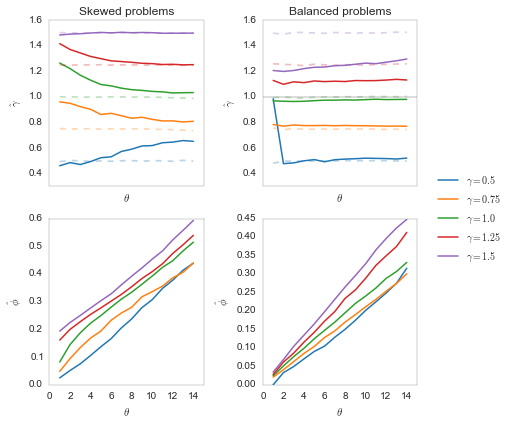

In [172]:
fig, axi = plt.subplots(2, 2, figsize=(6,6), sharex=True)

lw = 1.5

ax = axi[0][0]
#ax.plot(thetas, [cpt_fits[th].loc[0]['prelec_gamma'] for th in thetas],
#        label=('$\gamma=1$'))
for i, gamma in enumerate(gammas):
    ax.plot(thetas, [cpt_fits[(th,gamma)].loc[0]['prelec_gamma'] for th in thetas],
            label=('$\gamma=%s$' % gamma), linewidth=lw, color=tableau20[i*2])
    ax.plot(thetas, [chase_fits_skew[(th,gamma)]['prelec_gamma'] for th in thetas],
            '--', alpha=.3, color=tableau20[i*2])

#ax.plot([0, thetas[-1] + 1], [1, 1], '-', color='gray', alpha=.3)
ax.set_ylim(0.3, 1.6)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\hat{\gamma}$')
ax.set_title('Skewed problems')
#ax.legend()

#ax2 = ax.twinx()
ax = axi[1][0]
#ax.plot(thetas, [cpt_fits[th].loc[0]['s'] for th in thetas],
#         '-', label='$\gamma=1$')

for i, gamma in enumerate(gammas):
    ax.plot(thetas, [cpt_fits[(th,gamma)].loc[0]['s'] for th in thetas],
            '-', label=('$\gamma=%s$' % gamma), linewidth=lw, color=tableau20[i*2])


ax.set_xlim(0, 15)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\hat{\phi}$') 


ax = axi[0][1]
#ax.plot(thetas, [cpt_fits_bal[th].loc[0]['prelec_gamma'] for th in thetas],
#        label=('$\gamma=1$'))
for i, gamma in enumerate(gammas):
    ax.plot(thetas, [cpt_fits_bal[(th,gamma)].loc[0]['prelec_gamma'] for th in thetas],
            label=('$\gamma=%s$' % gamma), linewidth=lw, color=tableau20[i*2])
    ax.plot(thetas, [chase_fits_bal[(th,gamma)]['prelec_gamma'] for th in thetas],
            '--', alpha=.3, color=tableau20[i*2])

ax.plot([0, thetas[-1] + 1], [1, 1], '-', color='gray', alpha=.3)
ax.set_ylim(0.3, 1.6)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\hat{\gamma}$')
ax.set_title('Balanced problems')

#ax2 = ax.twinx()
ax = axi[1][1]
#ax.plot(thetas, [cpt_fits_bal[th].loc[0]['s'] for th in thetas],
#         '-', label='$\gamma=1$')

for i, gamma in enumerate(gammas):
    ax.plot(thetas, [cpt_fits_bal[(th,gamma)].loc[0]['s'] for th in thetas],
            '-', label=('$\gamma=%s$' % gamma), linewidth=lw, color=tableau20[i*2])

ax.set_xlim(0, 15)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\hat{\phi}$') 
ax.legend(loc='center right', bbox_to_anchor=(1.6,1))


for ax in axi.ravel():
    for i in ax.spines.itervalues():
        i.set_linewidth(.2)

plt.tight_layout()
plt.show()
fig.savefig(FIGDEST + 'cpt_fitting_combined.pdf', bbox_inches='tight')